In [38]:
import numpy as np 
import matplotlib.pyplot as plt
import sys

# sys.path.insert(1, '/home/eleve/Dokuments/Prepa/TIPE/V0/encephalon')
# sys.path.insert(1, '/home/eleve/Dokuments/Prepa/TIPE/V0/axon')
# sys.path.insert(1, '/home/eleve/Dokuments/Prepa/TIPE/V0/pons')

from encephalon import *
from axon import *
from pons import *

In [39]:
with open("/home/eleve/Dokuments/Prepa/TIPE/Percepton analogique V0/Data_dogs_cats.txt","r",encoding="utf8") as FichierDonnees:
    liste_a = list()
    liste_b = list()
    liste_c = list()
    liste_d = list()
    
    liste_chien_a = list()
    liste_chien_b = list()
    liste_chien_c = list()
    
    liste_chat_a = list()
    liste_chat_b = list()
    liste_chat_c = list()
    
    
    for line in FichierDonnees:
        if "#" in line :
        # on saute la ligne
            continue
        donnees = line.split()
        liste_a.append(float(donnees[0]))
        liste_b.append(float(donnees[1]))
        liste_c.append(float(donnees[2]))
        liste_d.append(int(donnees[3]))
        
        if (donnees[3]=="1"):
            liste_chien_a.append(float(donnees[0]))
            liste_chien_b.append(float(donnees[1]))
            liste_chien_c.append(float(donnees[2]))
        else:
            liste_chat_a.append(float(donnees[0]))
            liste_chat_b.append(float(donnees[1]))
            liste_chat_c.append(float(donnees[2]))
          
Data_X = np.zeros((3,len(liste_a)), dtype=float)
Data_chien = np.zeros((3,len(liste_chien_a)), dtype=float)
Data_chat = np.zeros((3,len(liste_chat_a)), dtype=float)


Data_X[0]=liste_a
Data_X[1]=liste_b
Data_X[2]=liste_c

Data_chien[0]=liste_chien_a
Data_chien[1]=liste_chien_b
Data_chien[2]=liste_chien_c

Data_chat[0]=liste_chat_a
Data_chat[1]=liste_chat_b
Data_chat[2]=liste_chat_c

Data_X = Data_X.transpose()
Data_chien = Data_chien.transpose()
Data_chat = Data_chat.transpose()

Data_Etiquette = np.array(liste_d)
Data_Etiquette = np.where(Data_Etiquette==0, -1 ,Data_Etiquette) # remplacement des 0 par des -1 pour les chats...

test = Data_X[0:50,0:2]
test2 = Data_Etiquette[0:50]

donnees = Data_X[:,0:2]

In [40]:
sign = (lambda x: np.where(x >= 0, 1, -1), lambda x,y: 0)
F = ReLU

In [41]:
ser , port = test_serial()
run_sim(ANN([2,1,1],f=F),port)

In [42]:
perceptron = NN([2,3,1],ser,name="perceptron_analogique",f=F)

In [43]:
for _ in range(6):
    print(serial_read(ser,0.5))

In [44]:
perceptron.train(donnees,Data_Etiquette,10000,learning_rate=0.9)

Epoch 10/10000   Error=1.011168
Epoch 20/10000   Error=0.987925
Epoch 30/10000   Error=0.987657
Epoch 40/10000   Error=0.987654
Epoch 50/10000   Error=0.987654
Epoch 60/10000   Error=0.987654
Epoch 70/10000   Error=0.987654
Epoch 80/10000   Error=0.987654
Epoch 90/10000   Error=0.987654
Epoch 100/10000   Error=0.987654
Epoch 110/10000   Error=0.987654
Epoch 120/10000   Error=0.987654
Epoch 130/10000   Error=0.987654
Epoch 140/10000   Error=0.987654
Epoch 150/10000   Error=0.987654
Epoch 160/10000   Error=0.987654
Epoch 170/10000   Error=0.987654
Epoch 180/10000   Error=0.987654


KeyboardInterrupt: 

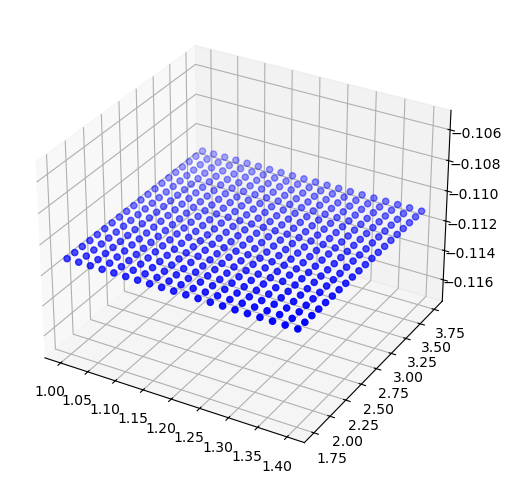

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


points = []
for x in np.linspace(1, 1.4, 20):
    for y in np.linspace(1.75, 3.75, 20):
        z = perceptron.use([x,y])
        points.append([x, y, z[0][0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()

W1: -1.0694680575700057 , W2: 0.4853372642491417 , b:   -0.18714019657863737
R1: -935.0442894686844 , R2: 2060.422872220796 , Rd2: -12.322280176276792


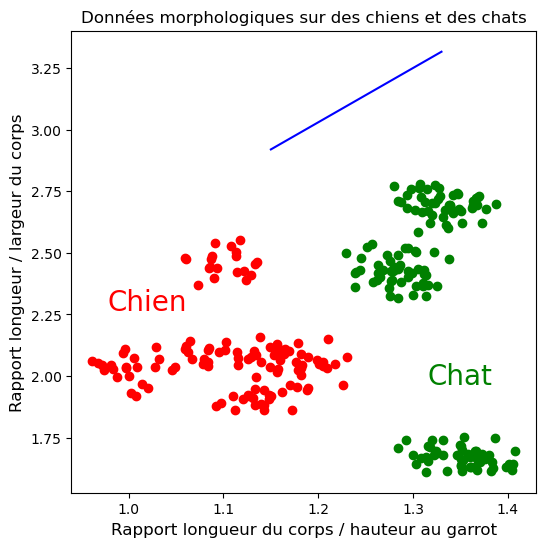

In [ ]:
def convertion(W1,W2,b):
    Ra = 10**3
    Rd1 = 10**3
    V = 15
    return Ra/W1 , Ra/W2, Rd1/(V/b - 1)
W1,W2,b = perceptron.W[1][0][0],perceptron.W[1][1][0],perceptron.b[1][0][0]
R1,R2,Rd2 = convertion(W1,W2,b)
print(f"W1: {W1} , W2: {W2} , b:   {b}\nR1: {R1} , R2: {R2} , Rd2: {Rd2}")

def Droite_decision(x, W1,W2, b):
    return -(W1/W2)*x - b/W2
X = np.arange(1.15 , 1.33 , 0.01)
Y = Droite_decision(X, W1,W2, b)

plt.rcParams['figure.figsize'] = [6, 6]

plt.plot(X,Y,'b')

plt.scatter(Data_chien[:,0], Data_chien[:,1], c='r')
plt.scatter(Data_chat[:,0], Data_chat[:,1], c='g')
plt.text(1.02, 2.3, 'Chien', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20, color = 'r')
plt.text(1.35, 2, 'Chat', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20, color = 'g')

plt.title('Données morphologiques sur des chiens et des chats', fontsize=12)
plt.xlabel("Rapport longueur du corps / hauteur au garrot", fontsize=12)
plt.ylabel('Rapport longueur / largeur du corps', fontsize=12)

plt.show()